# Identify the common entities across different relationships
***
Find node degree of the common entities and do a correlation analysis and visualize the results.

In [1]:
from analysis_utils import (
    load_data,
    merge_df,
    get_common_entities,
    plot_venn_diagram,
    calculate_common_node_degree,
    plot_common_entity_node_degree_distribution,
    plot_violin_distribution,
    plot_density_distribution,
    plot_common_entity_scatter_distribution
)

import pandas as pd
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load microbe-disease data from both disbiome and gmmad2 datasets
disbiome_md_df = load_data("../data/MAGNN_data/disbiome_taxid_mondo.dat", colname1="microbe", colname2="disease")
gmmad2_md_df = load_data("../data/MAGNN_data/gmmad2_taxid_mondo.dat", colname1="microbe", colname2="disease")
md_df = merge_df([disbiome_md_df, gmmad2_md_df])

Total count of edges: 
microbe    505325
disease    505325
dtype: int64


In [3]:
md_df["microbe"].value_counts().describe()

count    7167.000000
mean       70.507186
std        28.544884
min         1.000000
25%        82.000000
50%        82.000000
75%        82.000000
max       138.000000
Name: count, dtype: float64

In [4]:
md_df["disease"].value_counts().describe()

count     345.000000
mean     1464.710145
std      2606.598239
min         1.000000
25%         3.000000
50%         9.000000
75%        89.000000
max      6451.000000
Name: count, dtype: float64

In [5]:
# Load microbe-metabolite data from both hmdb and gmmad2 datasets
hmdb_mm_df = load_data("../data/MAGNN_data/hmdb_taxid_met.dat", colname1="microbe", colname2="metabolite")
gmmad2_mm_df = load_data("../data/MAGNN_data/gmmad2_taxid_met.dat", colname1="microbe", colname2="metabolite")
mm_df = merge_df([hmdb_mm_df, gmmad2_mm_df])

Total count of edges: 
microbe       599176
metabolite    599176
dtype: int64


In [6]:
mm_df["microbe"].value_counts().describe()

count    1308.000000
mean      458.085627
std       353.557481
min         1.000000
25%         3.000000
50%       619.000000
75%       741.000000
max      1011.000000
Name: count, dtype: float64

In [7]:
mm_df["metabolite"].value_counts().describe()

count    1716.000000
mean      349.170163
std       320.028516
min         1.000000
25%        26.000000
50%       263.000000
75%       685.000000
max       906.000000
Name: count, dtype: float64

In [8]:
# Load metabolite-disease data from hmdb
metd_df = load_data("../data/MAGNN_data/hmdb_met_disease.dat", colname1="metabolite", colname2="disease")

In [9]:
metd_df["metabolite"].value_counts().describe()

count    22590.000000
mean         1.219389
std          1.611041
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         78.000000
Name: count, dtype: float64

In [10]:
metd_df["disease"].value_counts()[lambda x: x < 20000].describe()

count    592.000000
mean      12.717905
std       61.291044
min        1.000000
25%        1.000000
50%        3.000000
75%        6.000000
max      832.000000
Name: count, dtype: float64

In [11]:
common_microbe = get_common_entities(md_df, mm_df, "microbe", labels="Microbe-Disease and Microbe-Metabolite")
common_disease = get_common_entities(md_df, metd_df, "disease", labels="Microbe-Disease and Metabolite-Disease")
common_metabolite = get_common_entities(mm_df, metd_df, "metabolite", labels="Microbe-Metabolite and Metabolite-Disease")

There are 273 common microbe entities between Microbe-Disease and Microbe-Metabolite.
There are 40 common disease entities between Microbe-Disease and Metabolite-Disease.
There are 483 common metabolite entities between Microbe-Metabolite and Metabolite-Disease.


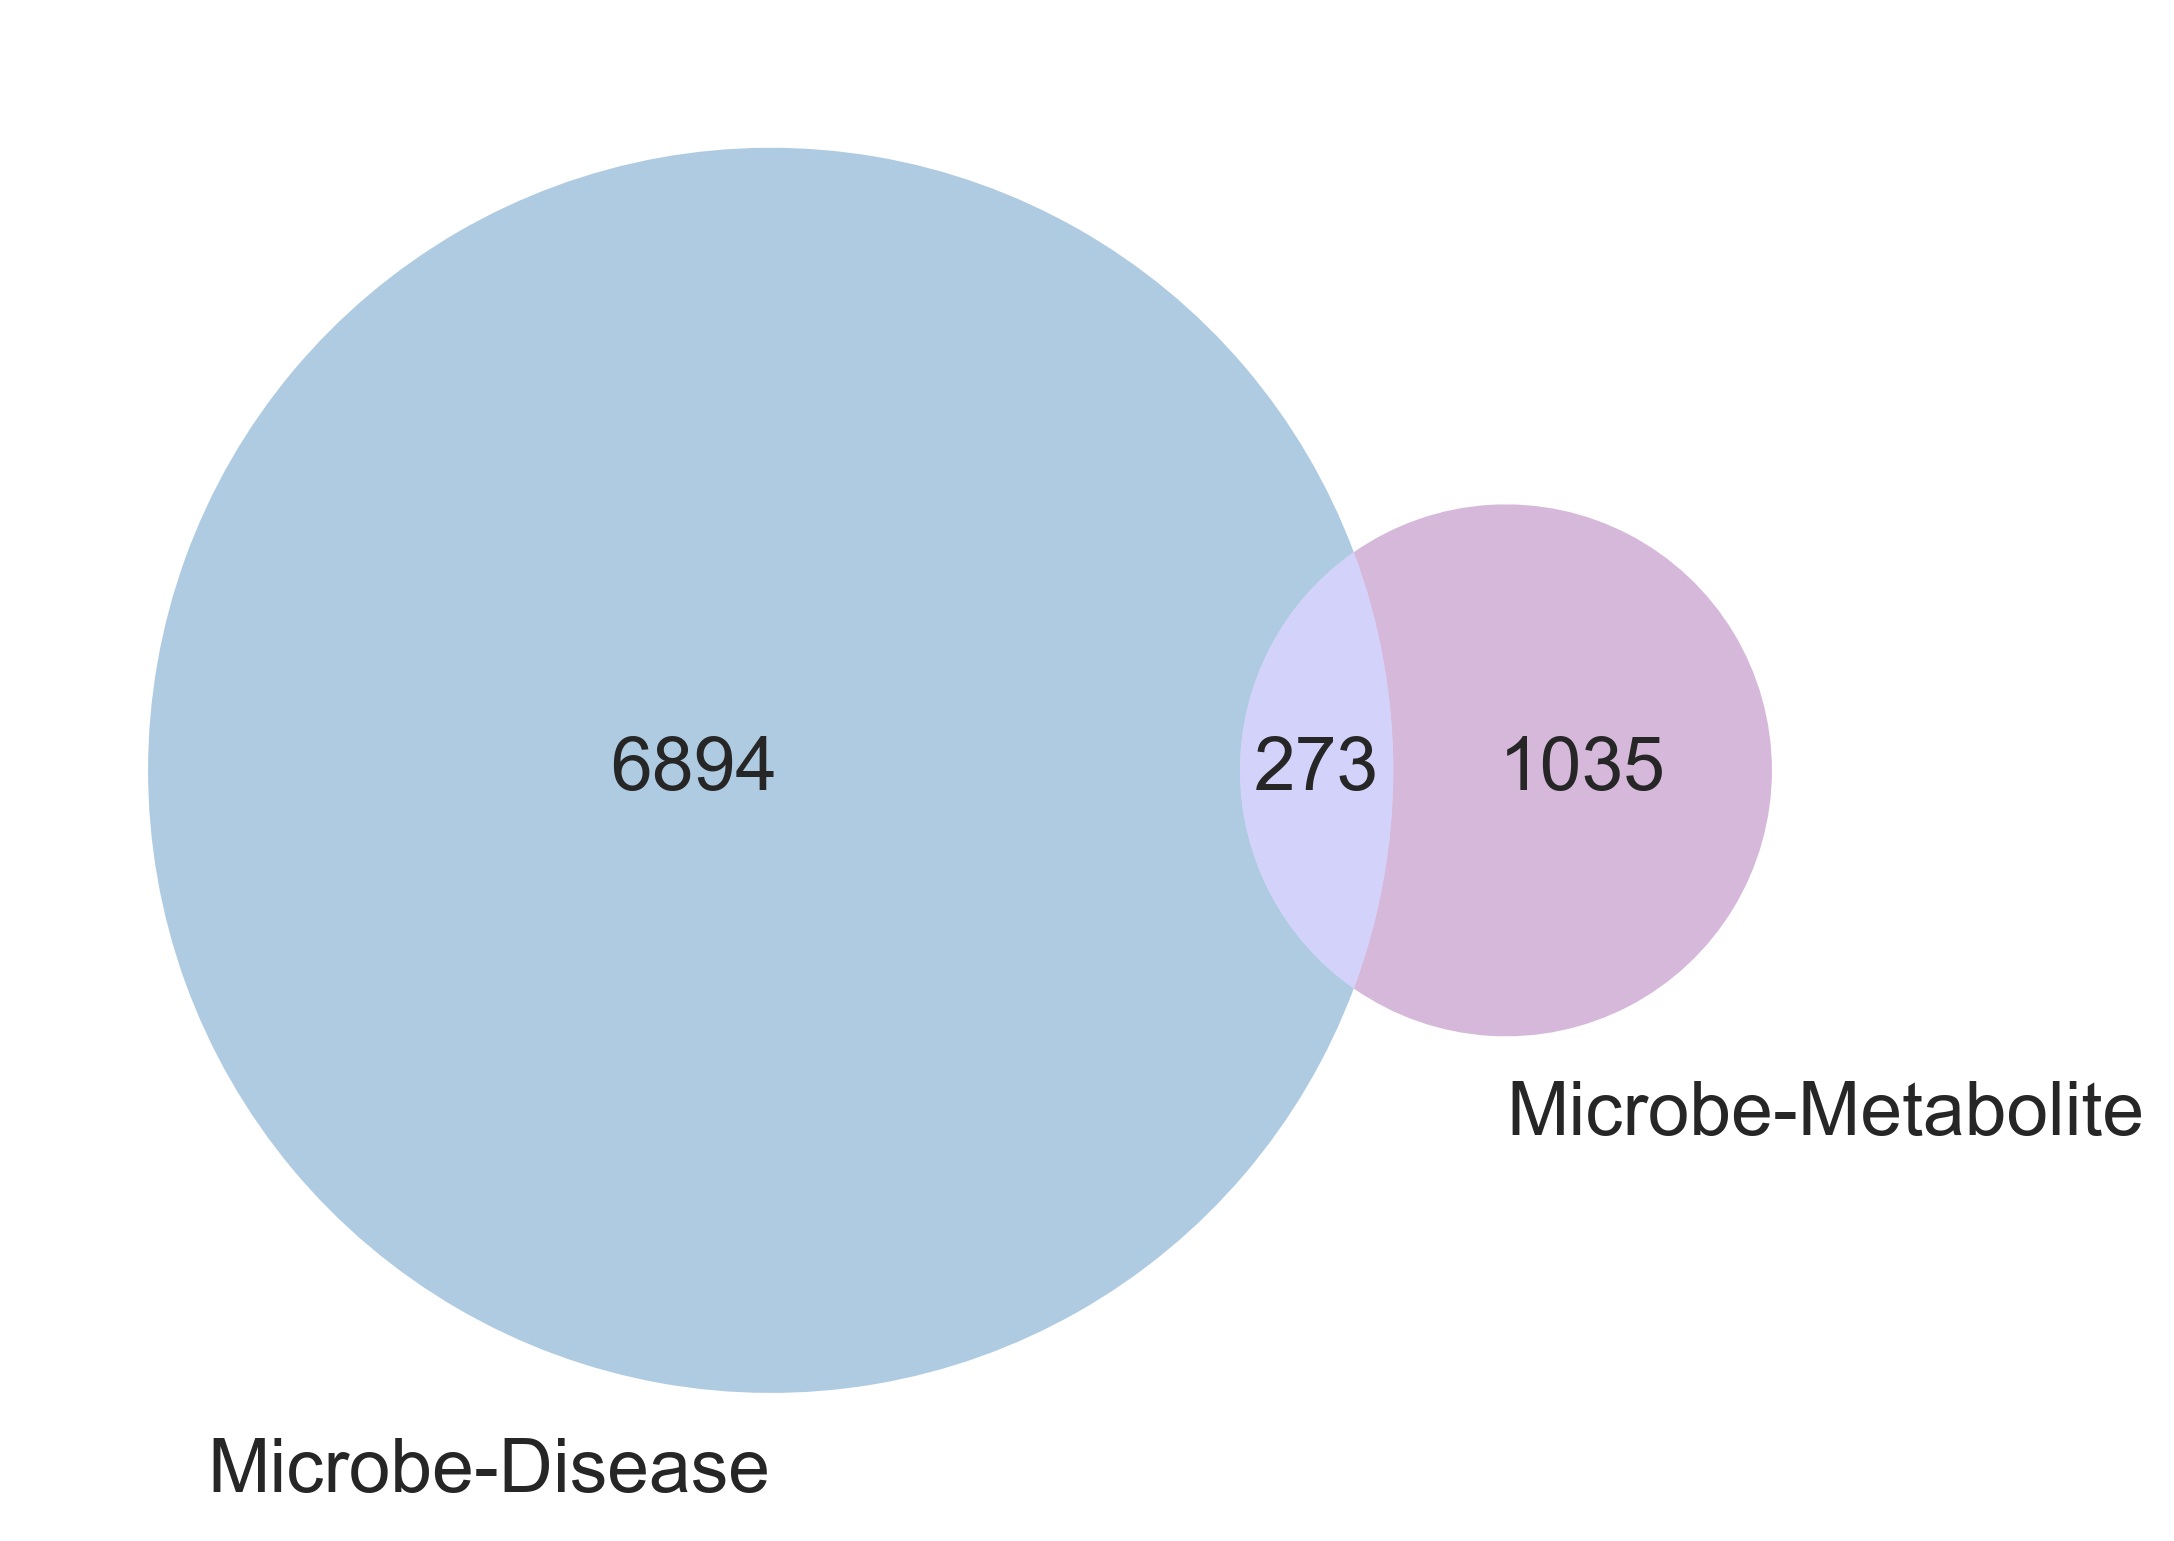

In [12]:
plot_venn_diagram([set(md_df["microbe"]), set(mm_df["microbe"])], 
                  ["Microbe-Disease", "Microbe-Metabolite"], 
                  colors=["#377eb8", "#984ea3"],
                  save_path="plots/correlation/venn_microbe.pdf")

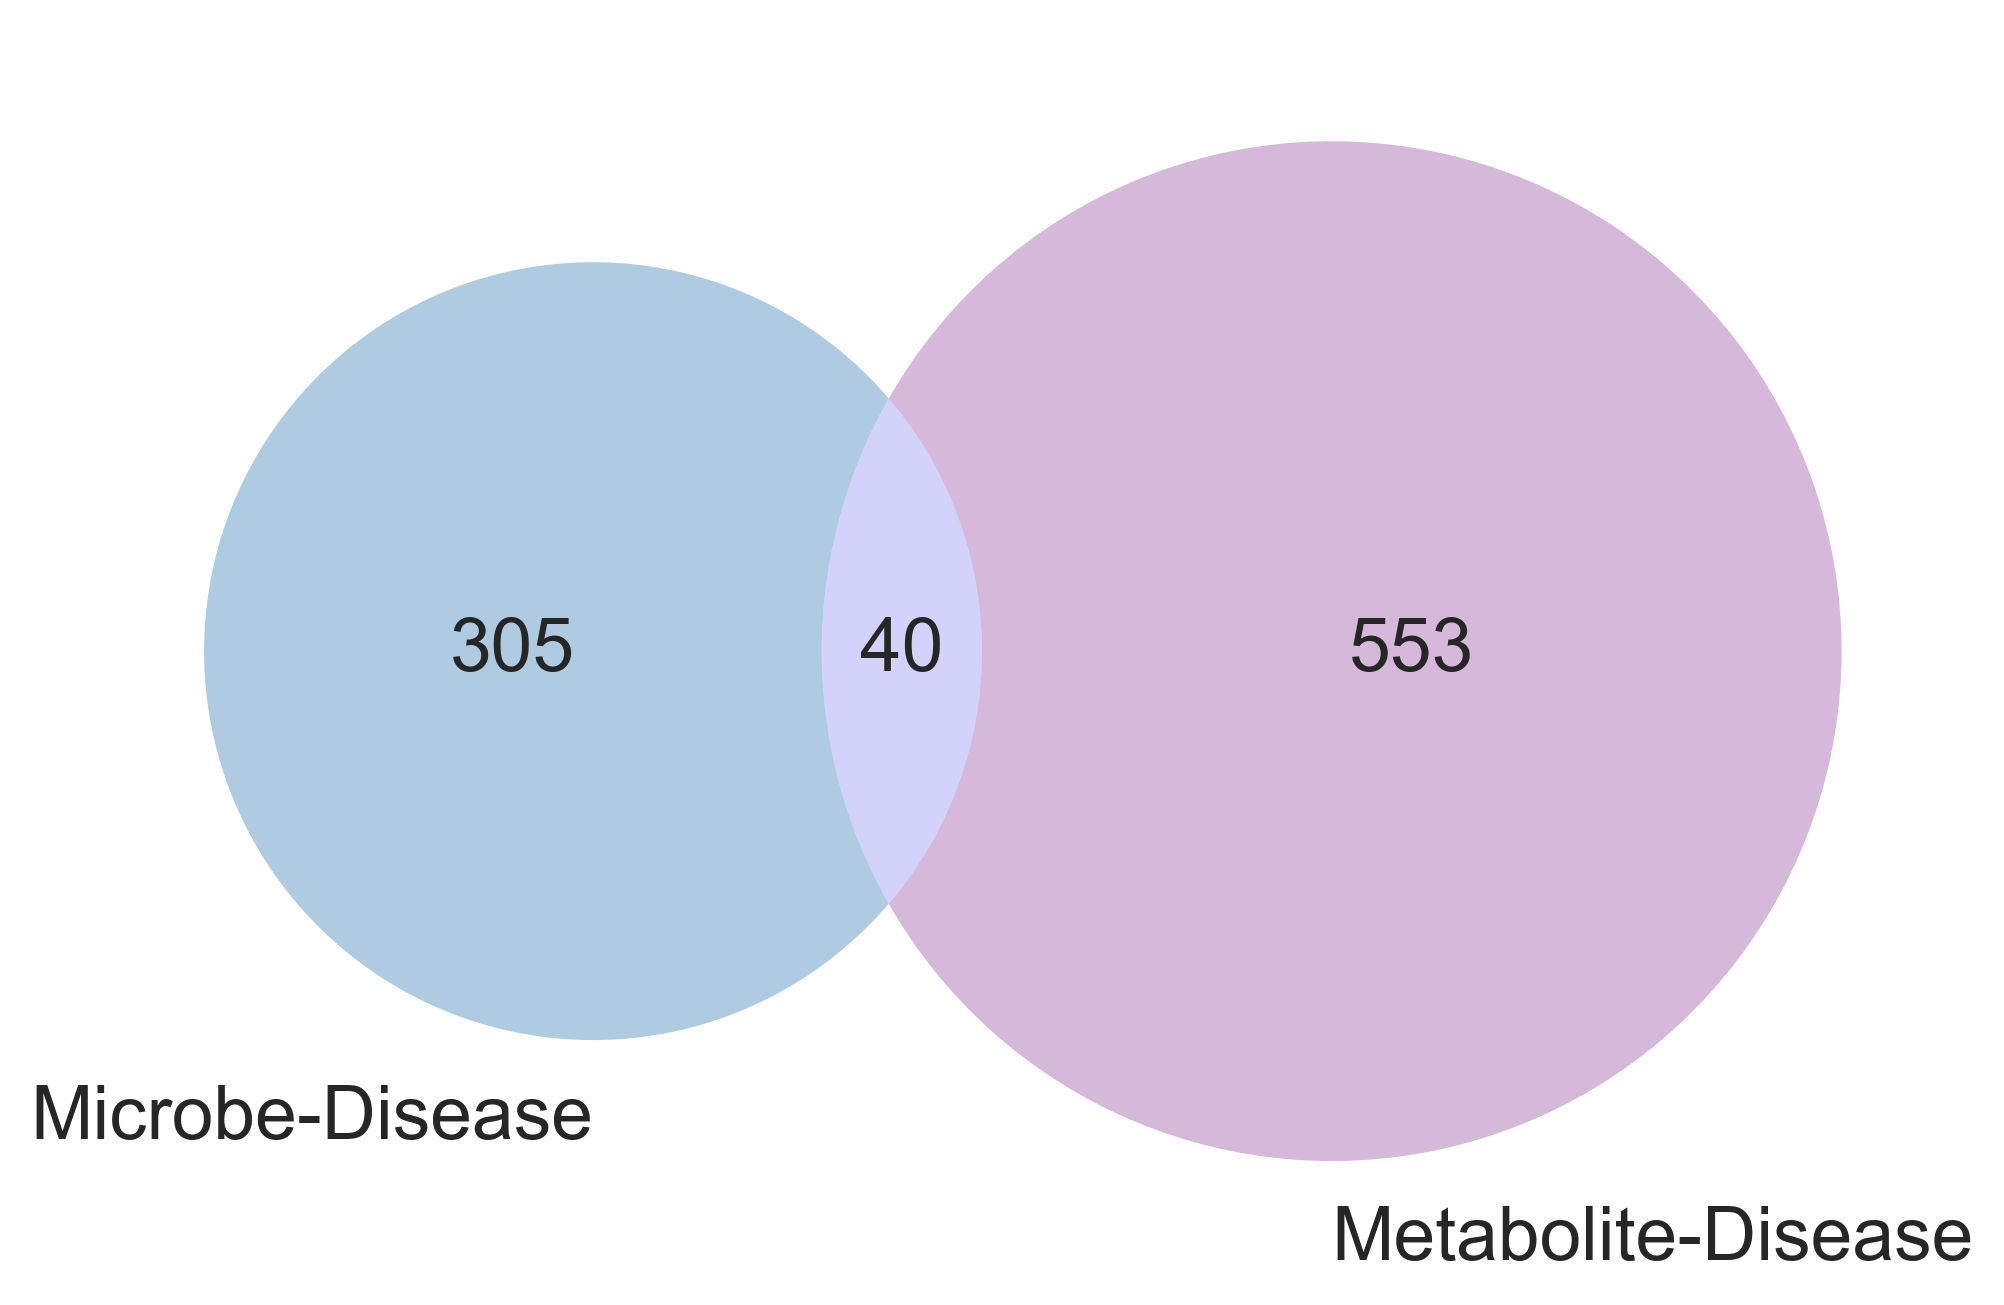

In [13]:
plot_venn_diagram([set(md_df["disease"]), set(metd_df["disease"])], 
                  ["Microbe-Disease", "Metabolite-Disease"],
                  colors=["#377eb8", "#984ea3"],
                  save_path="plots/correlation/venn_disease.pdf")

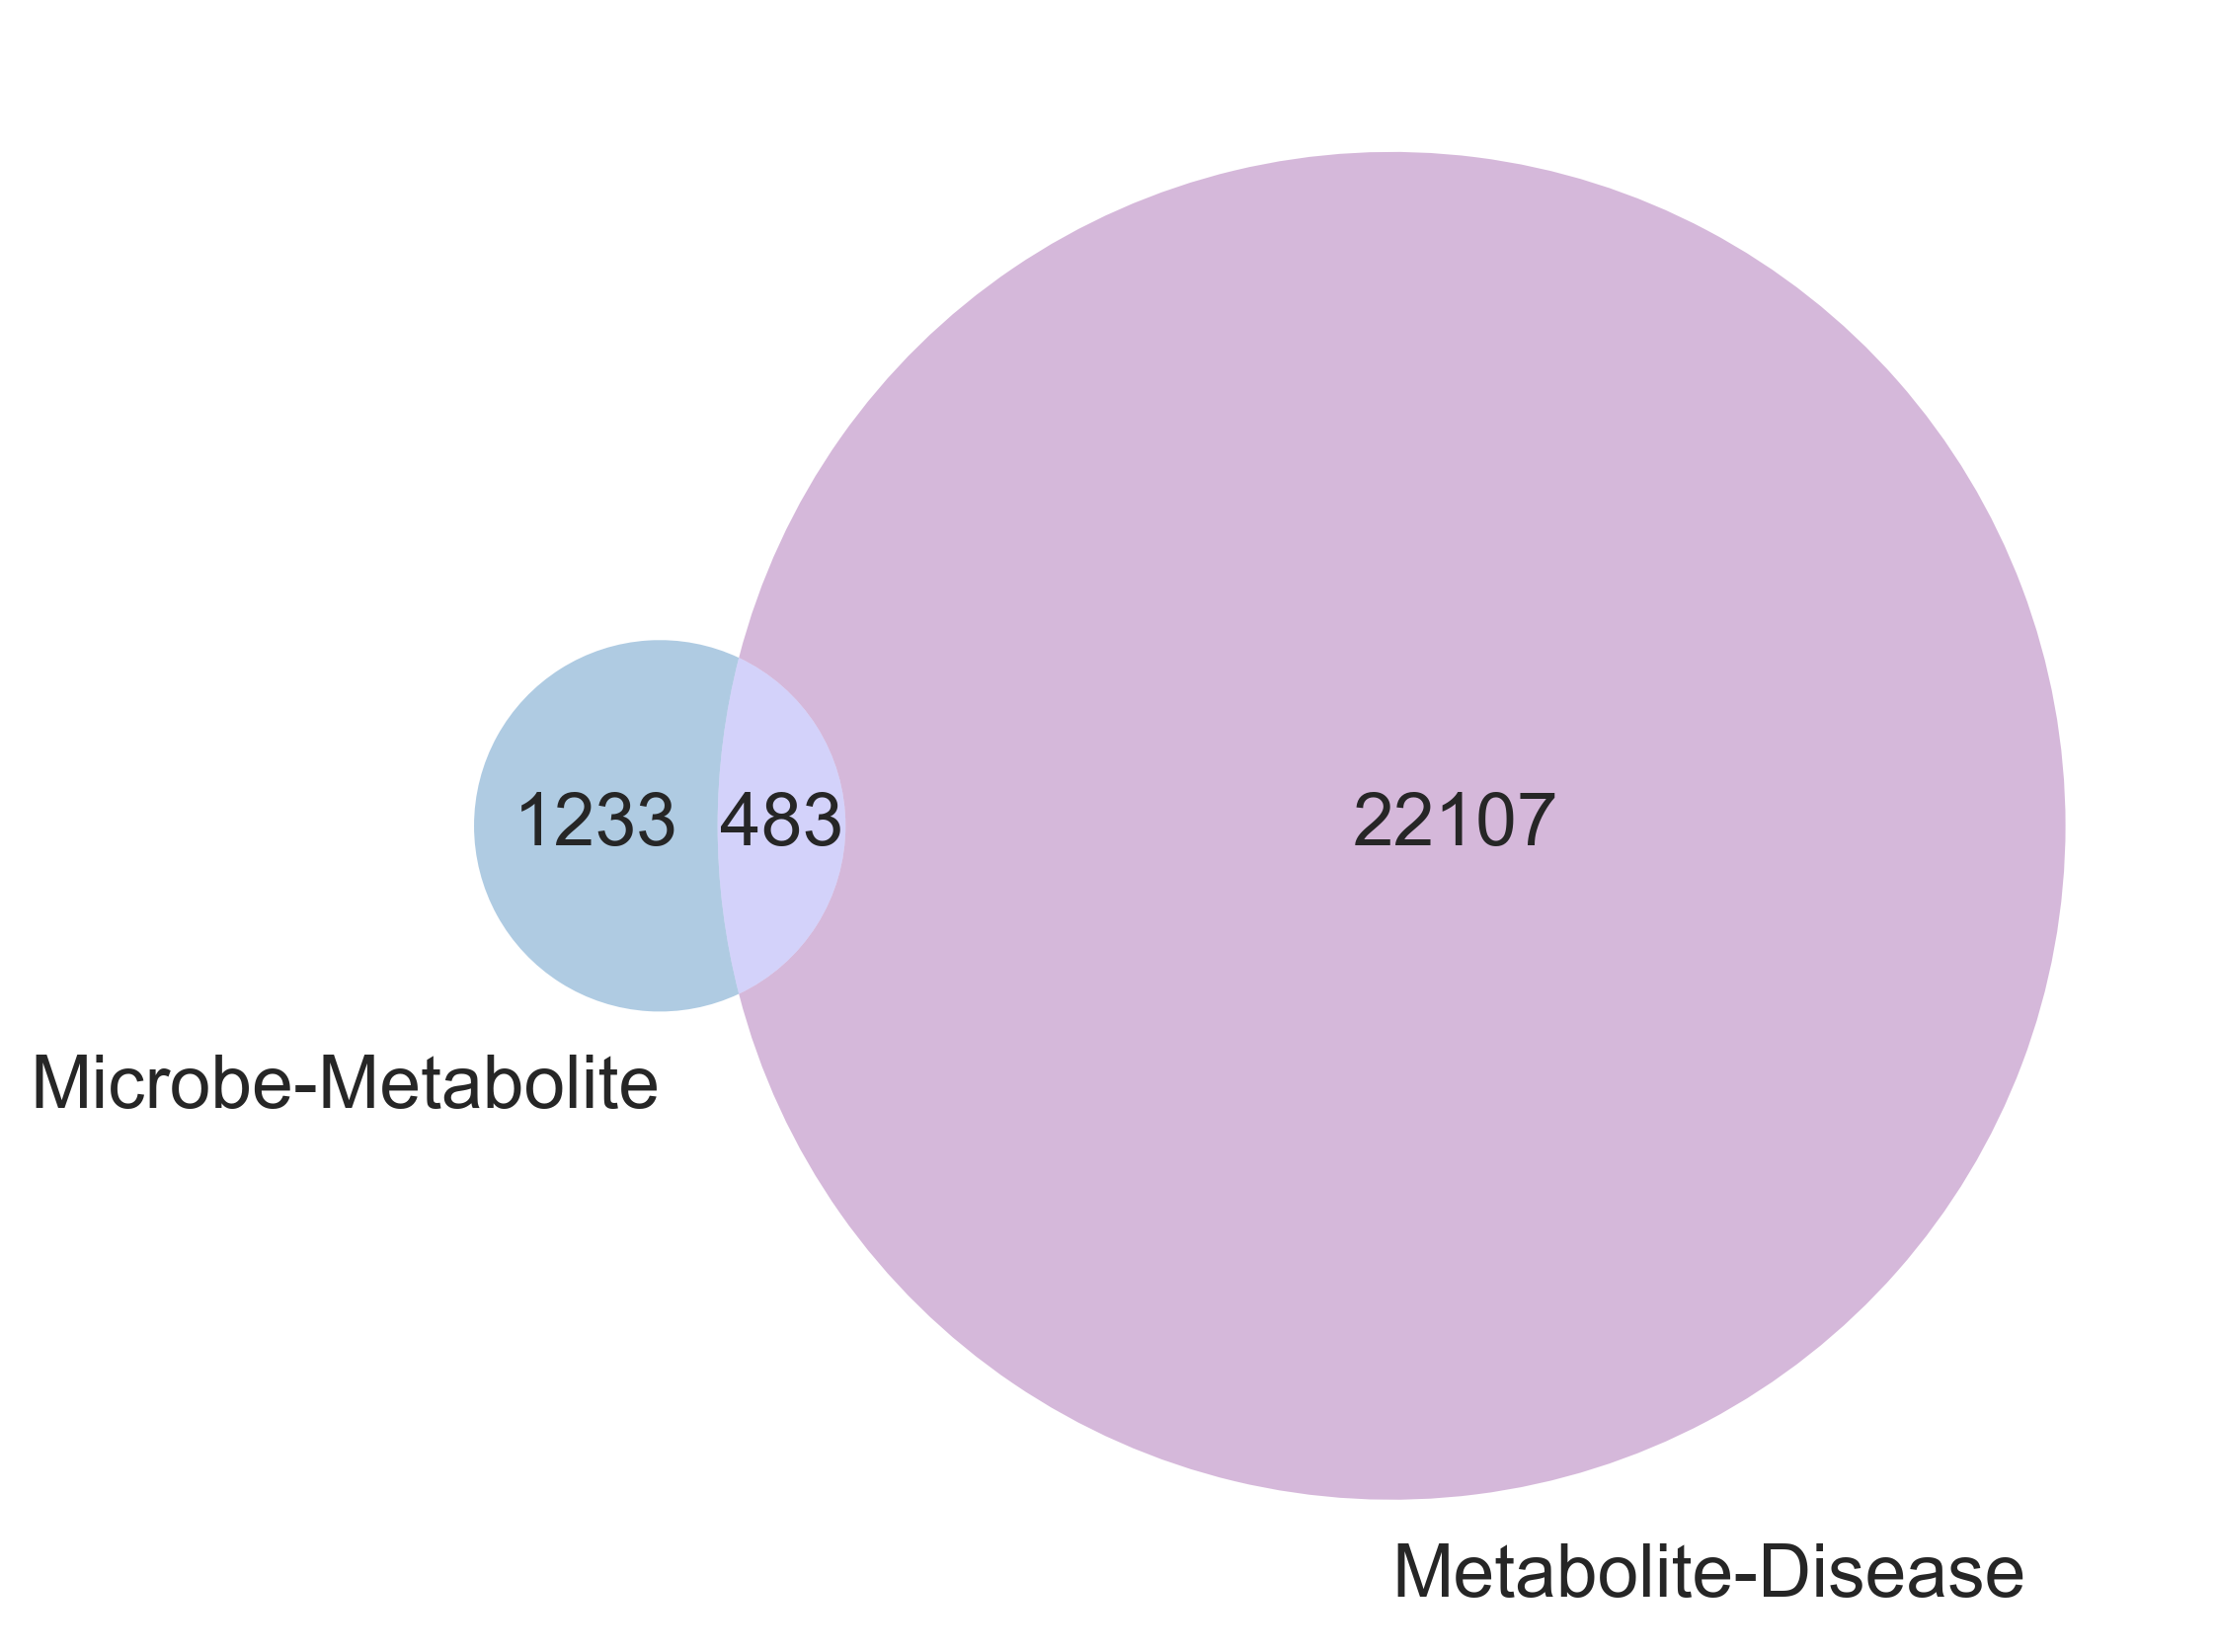

In [14]:
plot_venn_diagram([set(mm_df["metabolite"]), set(metd_df["metabolite"])], 
                  ["Microbe-Metabolite", "Metabolite-Disease"],
                  colors=["#377eb8", "#984ea3"],
                  save_path="plots/correlation/venn_metabolite.pdf")

In [15]:
node_d4microbe = calculate_common_node_degree(md_df, mm_df, "microbe", common_microbe)
node_d4microbe

[('NCBITaxon:562', 105, 921),
 ('NCBITaxon:244366', 82, 941),
 ('NCBITaxon:469613', 82, 869),
 ('NCBITaxon:1399', 82, 856),
 ('NCBITaxon:35841', 82, 835),
 ('NCBITaxon:1296', 82, 818),
 ('NCBITaxon:329', 83, 812),
 ('NCBITaxon:563193', 82, 791),
 ('NCBITaxon:457395', 82, 790),
 ('NCBITaxon:105841', 82, 790),
 ('NCBITaxon:469592', 82, 769),
 ('NCBITaxon:818', 87, 748),
 ('NCBITaxon:469588', 82, 753),
 ('NCBITaxon:457387', 82, 749),
 ('NCBITaxon:552398', 82, 744),
 ('NCBITaxon:469591', 82, 735),
 ('NCBITaxon:457421', 82, 733),
 ('NCBITaxon:457394', 82, 721),
 ('NCBITaxon:658089', 82, 713),
 ('NCBITaxon:457391', 82, 712),
 ('NCBITaxon:469593', 82, 705),
 ('NCBITaxon:469590', 82, 704),
 ('NCBITaxon:457392', 82, 699),
 ('NCBITaxon:457412', 82, 698),
 ('NCBITaxon:411484', 82, 695),
 ('NCBITaxon:457390', 82, 688),
 ('NCBITaxon:187327', 82, 688),
 ('NCBITaxon:585544', 82, 685),
 ('NCBITaxon:1042156', 82, 684),
 ('NCBITaxon:457396', 82, 674),
 ('NCBITaxon:469585', 82, 667),
 ('NCBITaxon:469589'

In [16]:
node_d_microbe_df = pd.DataFrame(node_d4microbe, columns=["microbe", "nd_md", "nd_mm"])
node_d_microbe_df

,microbe,nd_md,nd_mm
0,NCBITaxon:562,105,921
1,NCBITaxon:244366,82,941
2,NCBITaxon:469613,82,869
3,NCBITaxon:1399,82,856
4,NCBITaxon:35841,82,835
...,...,...,...
268,NCBITaxon:69962,1,1
269,NCBITaxon:1526,1,1
270,NCBITaxon:661,1,1
271,NCBITaxon:2242,1,1


In [17]:
data1=node_d_microbe_df["nd_md"].describe()

In [18]:
data2=node_d_microbe_df["nd_mm"].describe()

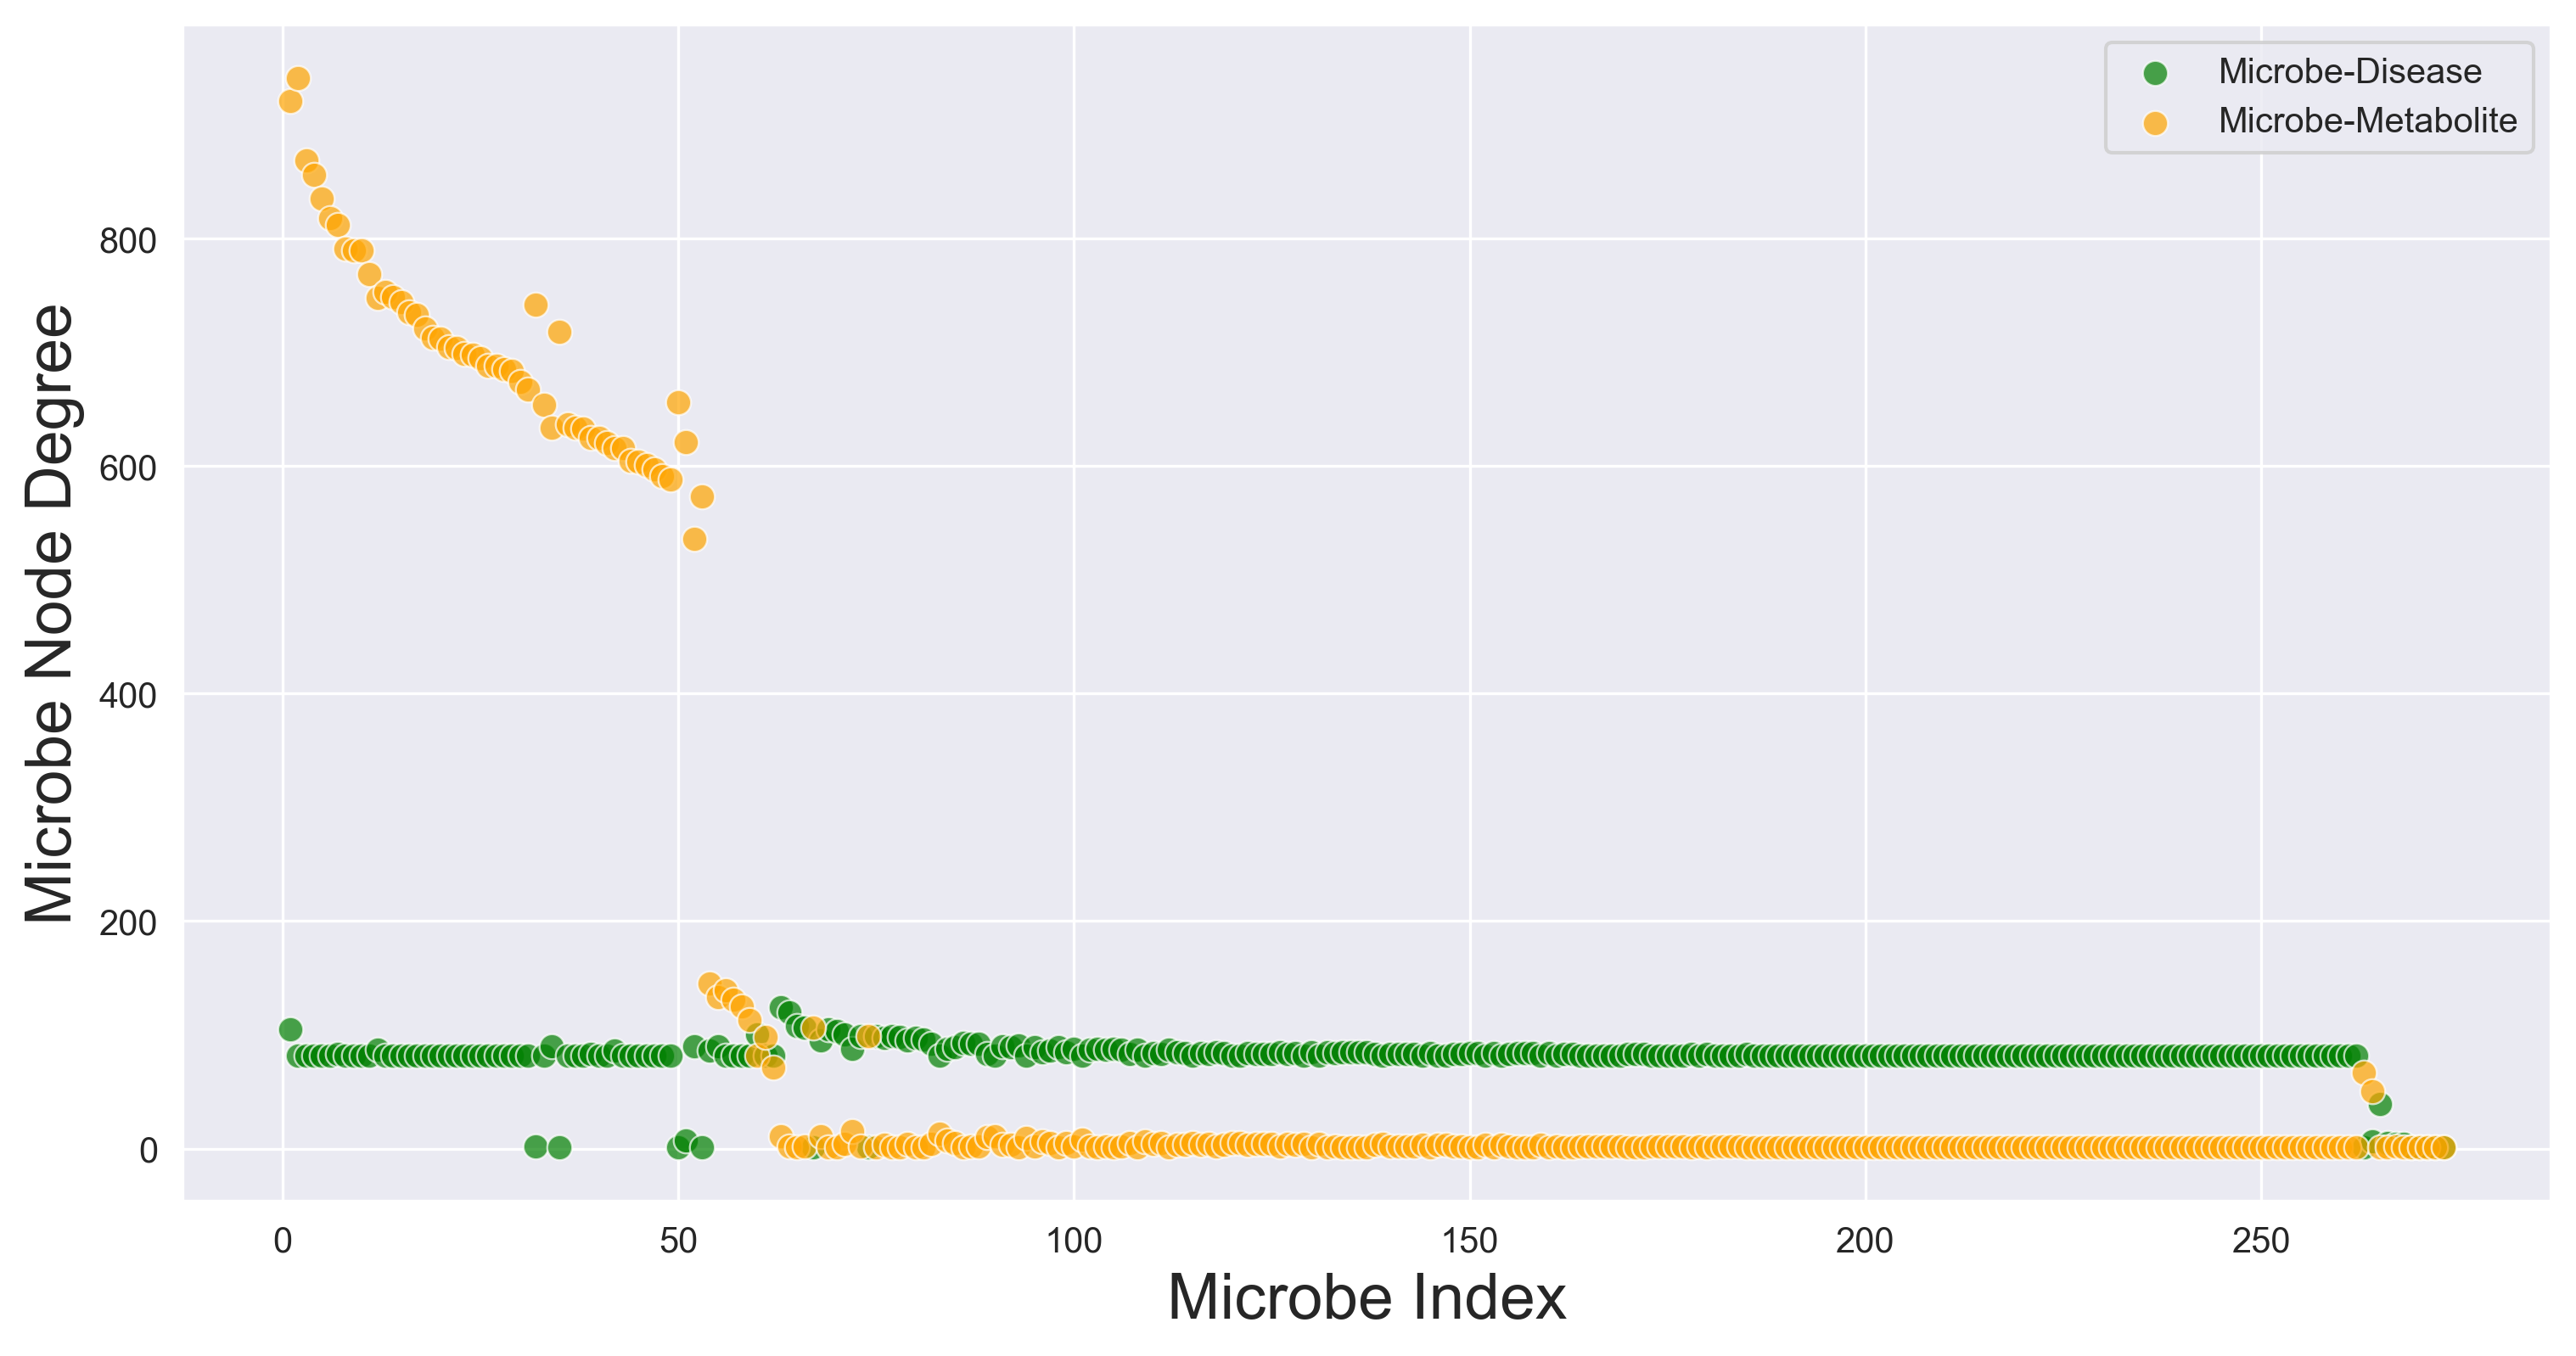

In [19]:
plot_common_entity_scatter_distribution(node_d4microbe, "microbe", "Microbe-Disease", "Microbe-Metabolite", color1="green", color2="orange", dot_size=50)

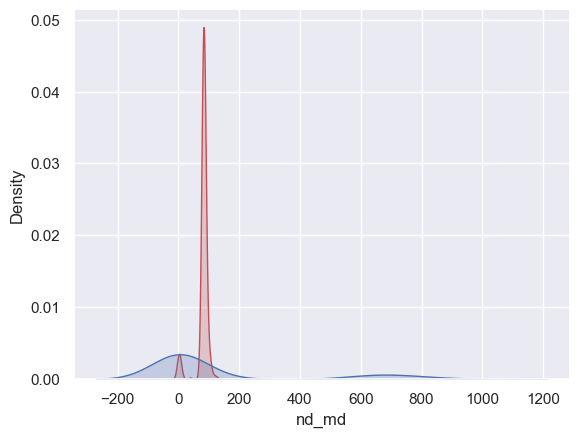

In [20]:
sns.set_theme(style="darkgrid")
sns.kdeplot(node_d_microbe_df['nd_md'], fill=True, color="r")
sns.kdeplot(node_d_microbe_df['nd_mm'], fill=True, color="b")
plt.show()

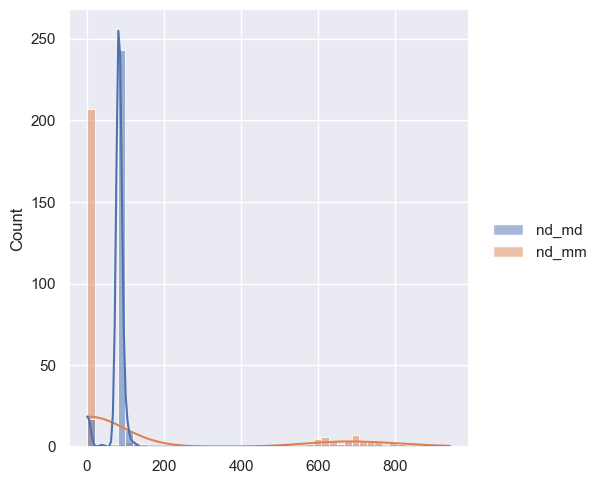

In [21]:
sns.displot(node_d_microbe_df, kde=True)

In [22]:
node_d4disease = calculate_common_node_degree(md_df, metd_df, "disease", common_disease)
node_d4disease

[('MONDO:0005101', 6226, 304),
 ('MONDO:0005148', 6211, 47),
 ('MONDO:0005052', 6139, 111),
 ('MONDO:0005260', 6130, 108),
 ('MONDO:0024388', 6182, 7),
 ('MONDO:0009061', 6162, 24),
 ('MONDO:0008383', 6118, 32),
 ('MONDO:0009861', 6102, 27),
 ('MONDO:0015183', 6121, 4),
 ('MONDO:0005147', 6102, 18),
 ('MONDO:0011565', 6110, 5),
 ('MONDO:0005154', 6104, 8),
 ('MONDO:0010726', 6109, 2),
 ('MONDO:0018076', 6108, 1),
 ('MONDO:0005027', 6103, 5),
 ('MONDO:0011382', 6103, 4),
 ('MONDO:0005575', 78, 832),
 ('MONDO:0005090', 42, 123),
 ('MONDO:0008226', 52, 84),
 ('MONDO:0002635', 37, 68),
 ('MESH:D012907', 57, 15),
 ('MONDO:0008903', 24, 41),
 ('MONDO:0005081', 10, 47),
 ('MONDO:0005300', 31, 3),
 ('MONDO:0005546', 21, 5),
 ('MONDO:0002009', 10, 14),
 ('MONDO:0005010', 17, 2),
 ('MONDO:0007803', 15, 2),
 ('MONDO:0858950', 3, 9),
 ('MONDO:0008487', 9, 2),
 ('MONDO:0005649', 10, 1),
 ('MONDO:0002974', 9, 1),
 ('MONDO:0006665', 8, 1),
 ('MONDO:0005264', 7, 2),
 ('MONDO:0011962', 3, 5),
 ('MONDO:

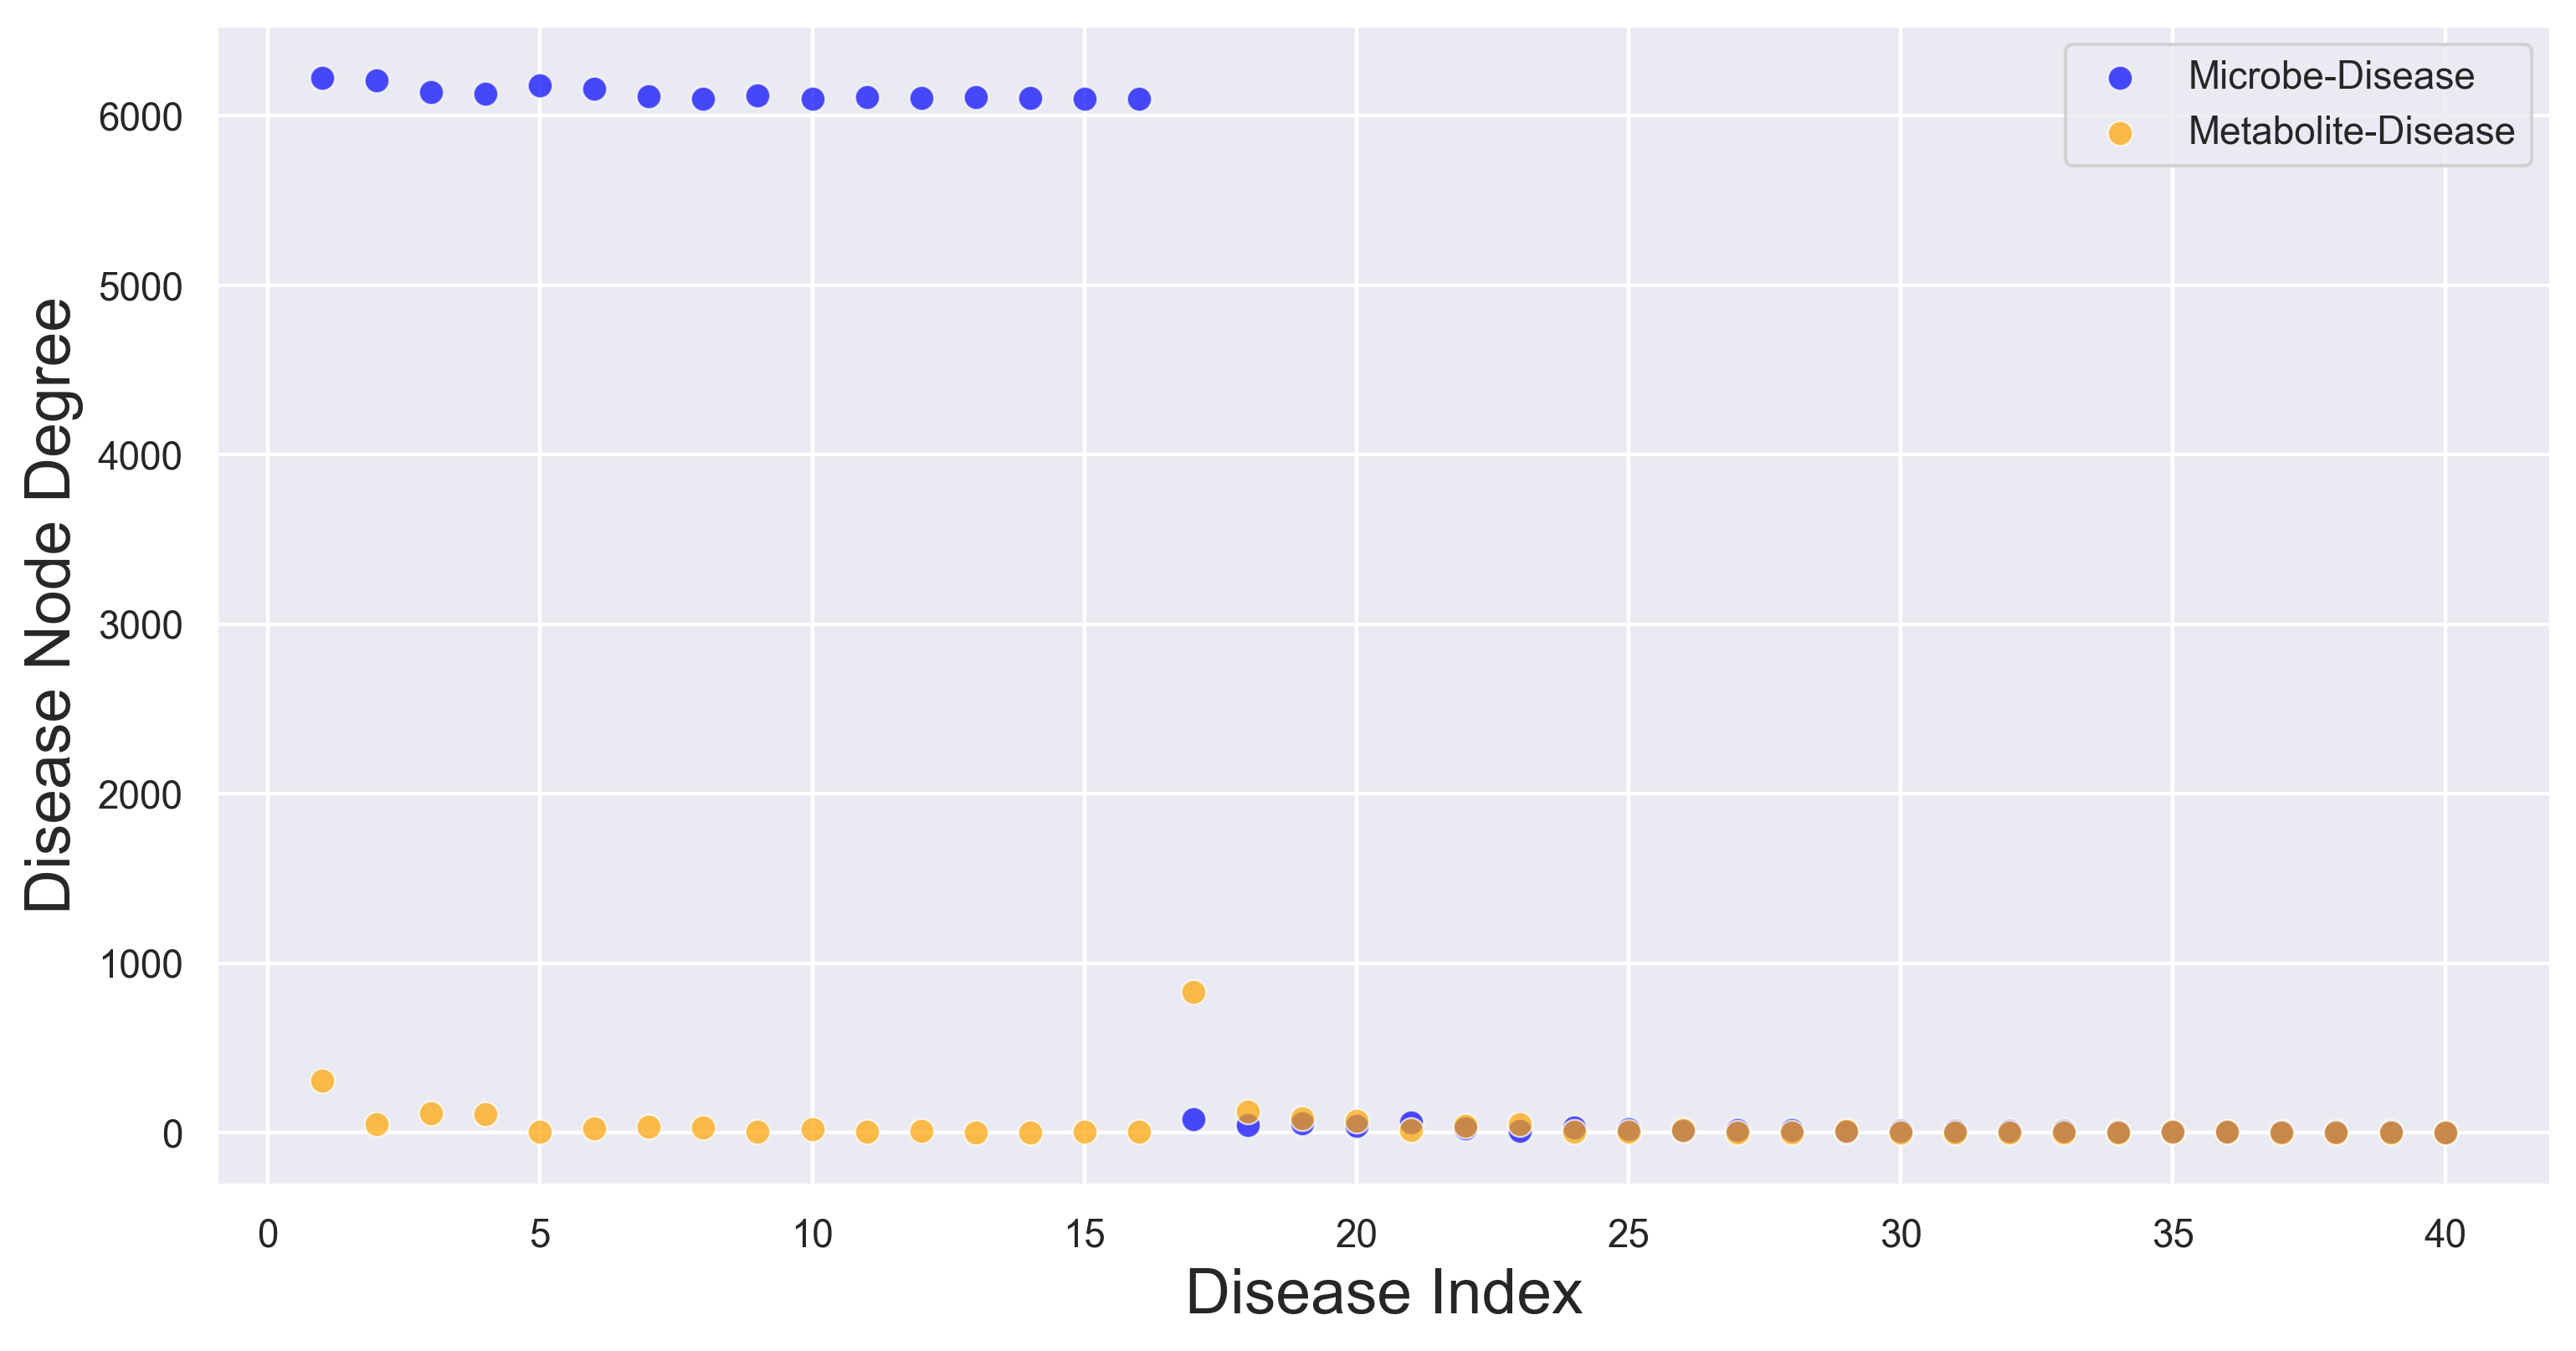

In [23]:
plot_common_entity_scatter_distribution(node_d4disease, "disease", "Microbe-Disease", "Metabolite-Disease", color1="blue", color2="orange", dot_size=50)

In [24]:
node_d4metabolite = calculate_common_node_degree(mm_df, metd_df, "metabolite", common_metabolite)
node_d4metabolite

[('PUBCHEM.COMPOUND:5950', 906, 39),
 ('PUBCHEM.COMPOUND:750', 896, 46),
 ('PUBCHEM.COMPOUND:6287', 898, 34),
 ('PUBCHEM.COMPOUND:145742', 900, 31),
 ('PUBCHEM.COMPOUND:6322', 893, 38),
 ('PUBCHEM.COMPOUND:5962', 895, 36),
 ('PUBCHEM.COMPOUND:6274', 887, 26),
 ('PUBCHEM.COMPOUND:6137', 885, 27),
 ('PUBCHEM.COMPOUND:6057', 883, 29),
 ('PUBCHEM.COMPOUND:6288', 885, 26),
 ('PUBCHEM.COMPOUND:6106', 880, 28),
 ('PUBCHEM.COMPOUND:6306', 880, 26),
 ('PUBCHEM.COMPOUND:33032', 878, 24),
 ('PUBCHEM.COMPOUND:6140', 870, 31),
 ('PUBCHEM.COMPOUND:9750', 874, 27),
 ('PUBCHEM.COMPOUND:6305', 870, 28),
 ('PUBCHEM.COMPOUND:5951', 860, 29),
 ('PUBCHEM.COMPOUND:1174', 872, 17),
 ('PUBCHEM.COMPOUND:1060', 856, 31),
 ('PUBCHEM.COMPOUND:190', 875, 12),
 ('PUBCHEM.COMPOUND:5960', 867, 19),
 ('PUBCHEM.COMPOUND:6267', 861, 17),
 ('PUBCHEM.COMPOUND:5961', 853, 25),
 ('PUBCHEM.COMPOUND:444972', 866, 11),
 ('PUBCHEM.COMPOUND:938', 862, 7),
 ('PUBCHEM.COMPOUND:107689', 790, 78),
 ('PUBCHEM.COMPOUND:6175', 853, 11)

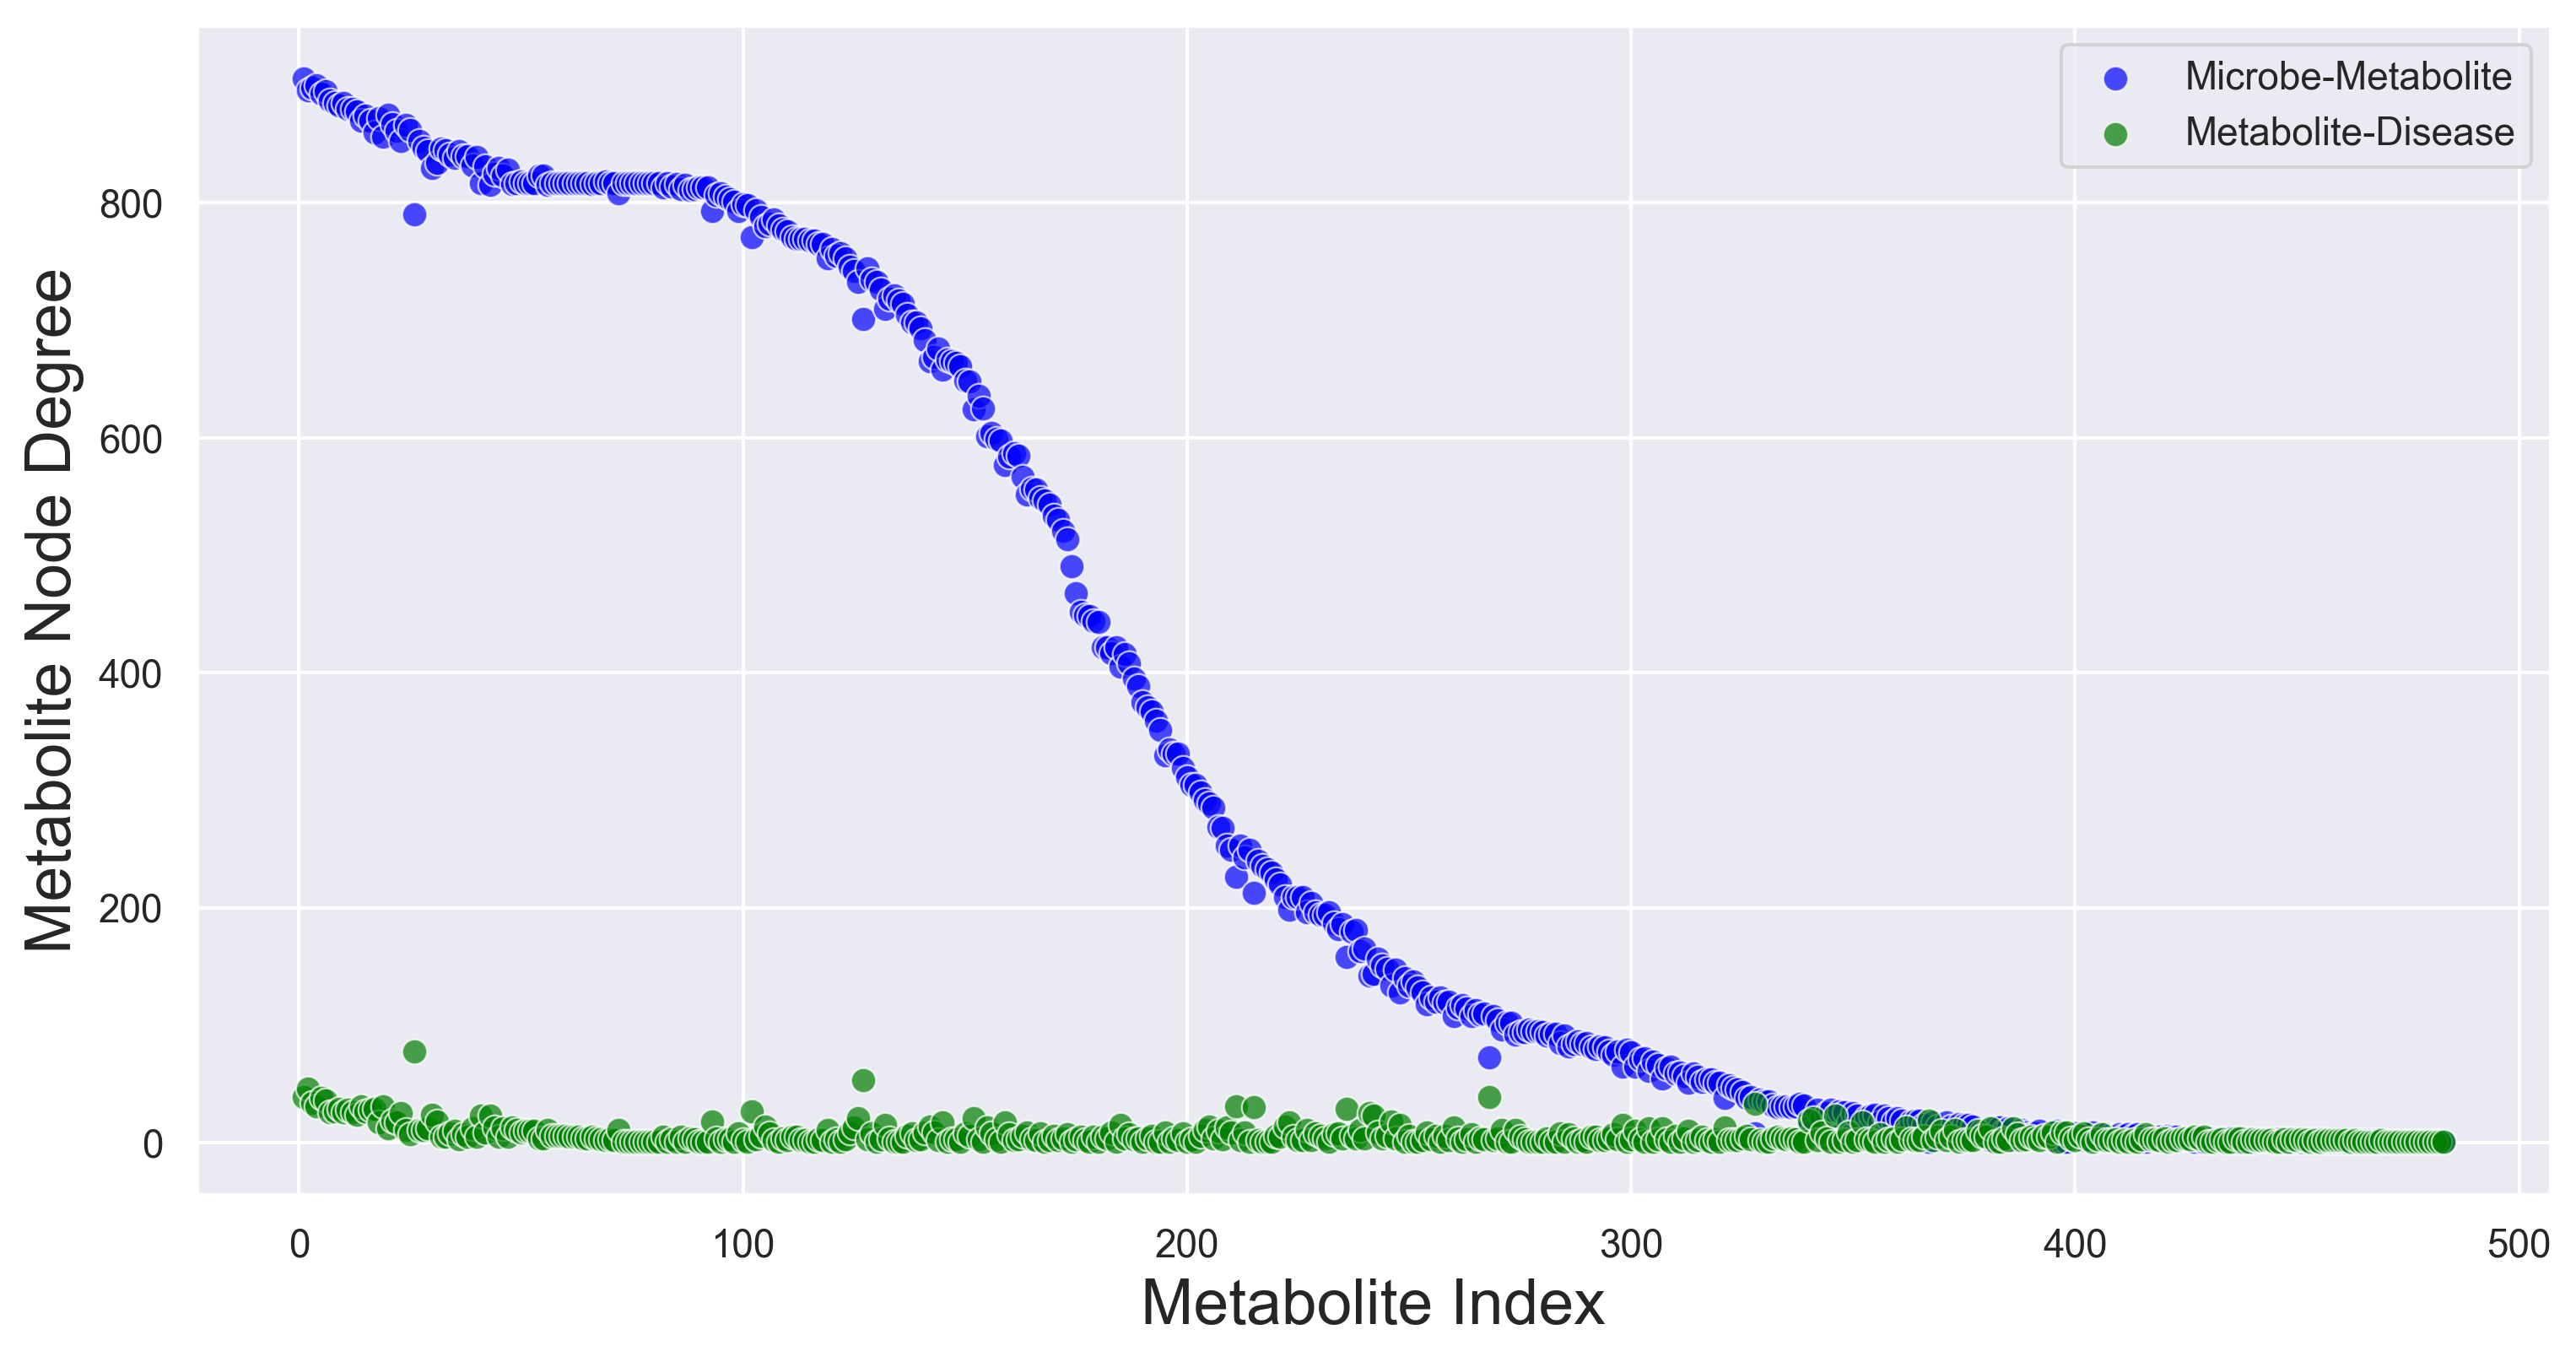

In [25]:
plot_common_entity_scatter_distribution(node_d4metabolite, "metabolite", "Microbe-Metabolite", "Metabolite-Disease", color1="blue", color2="green", dot_size=50)

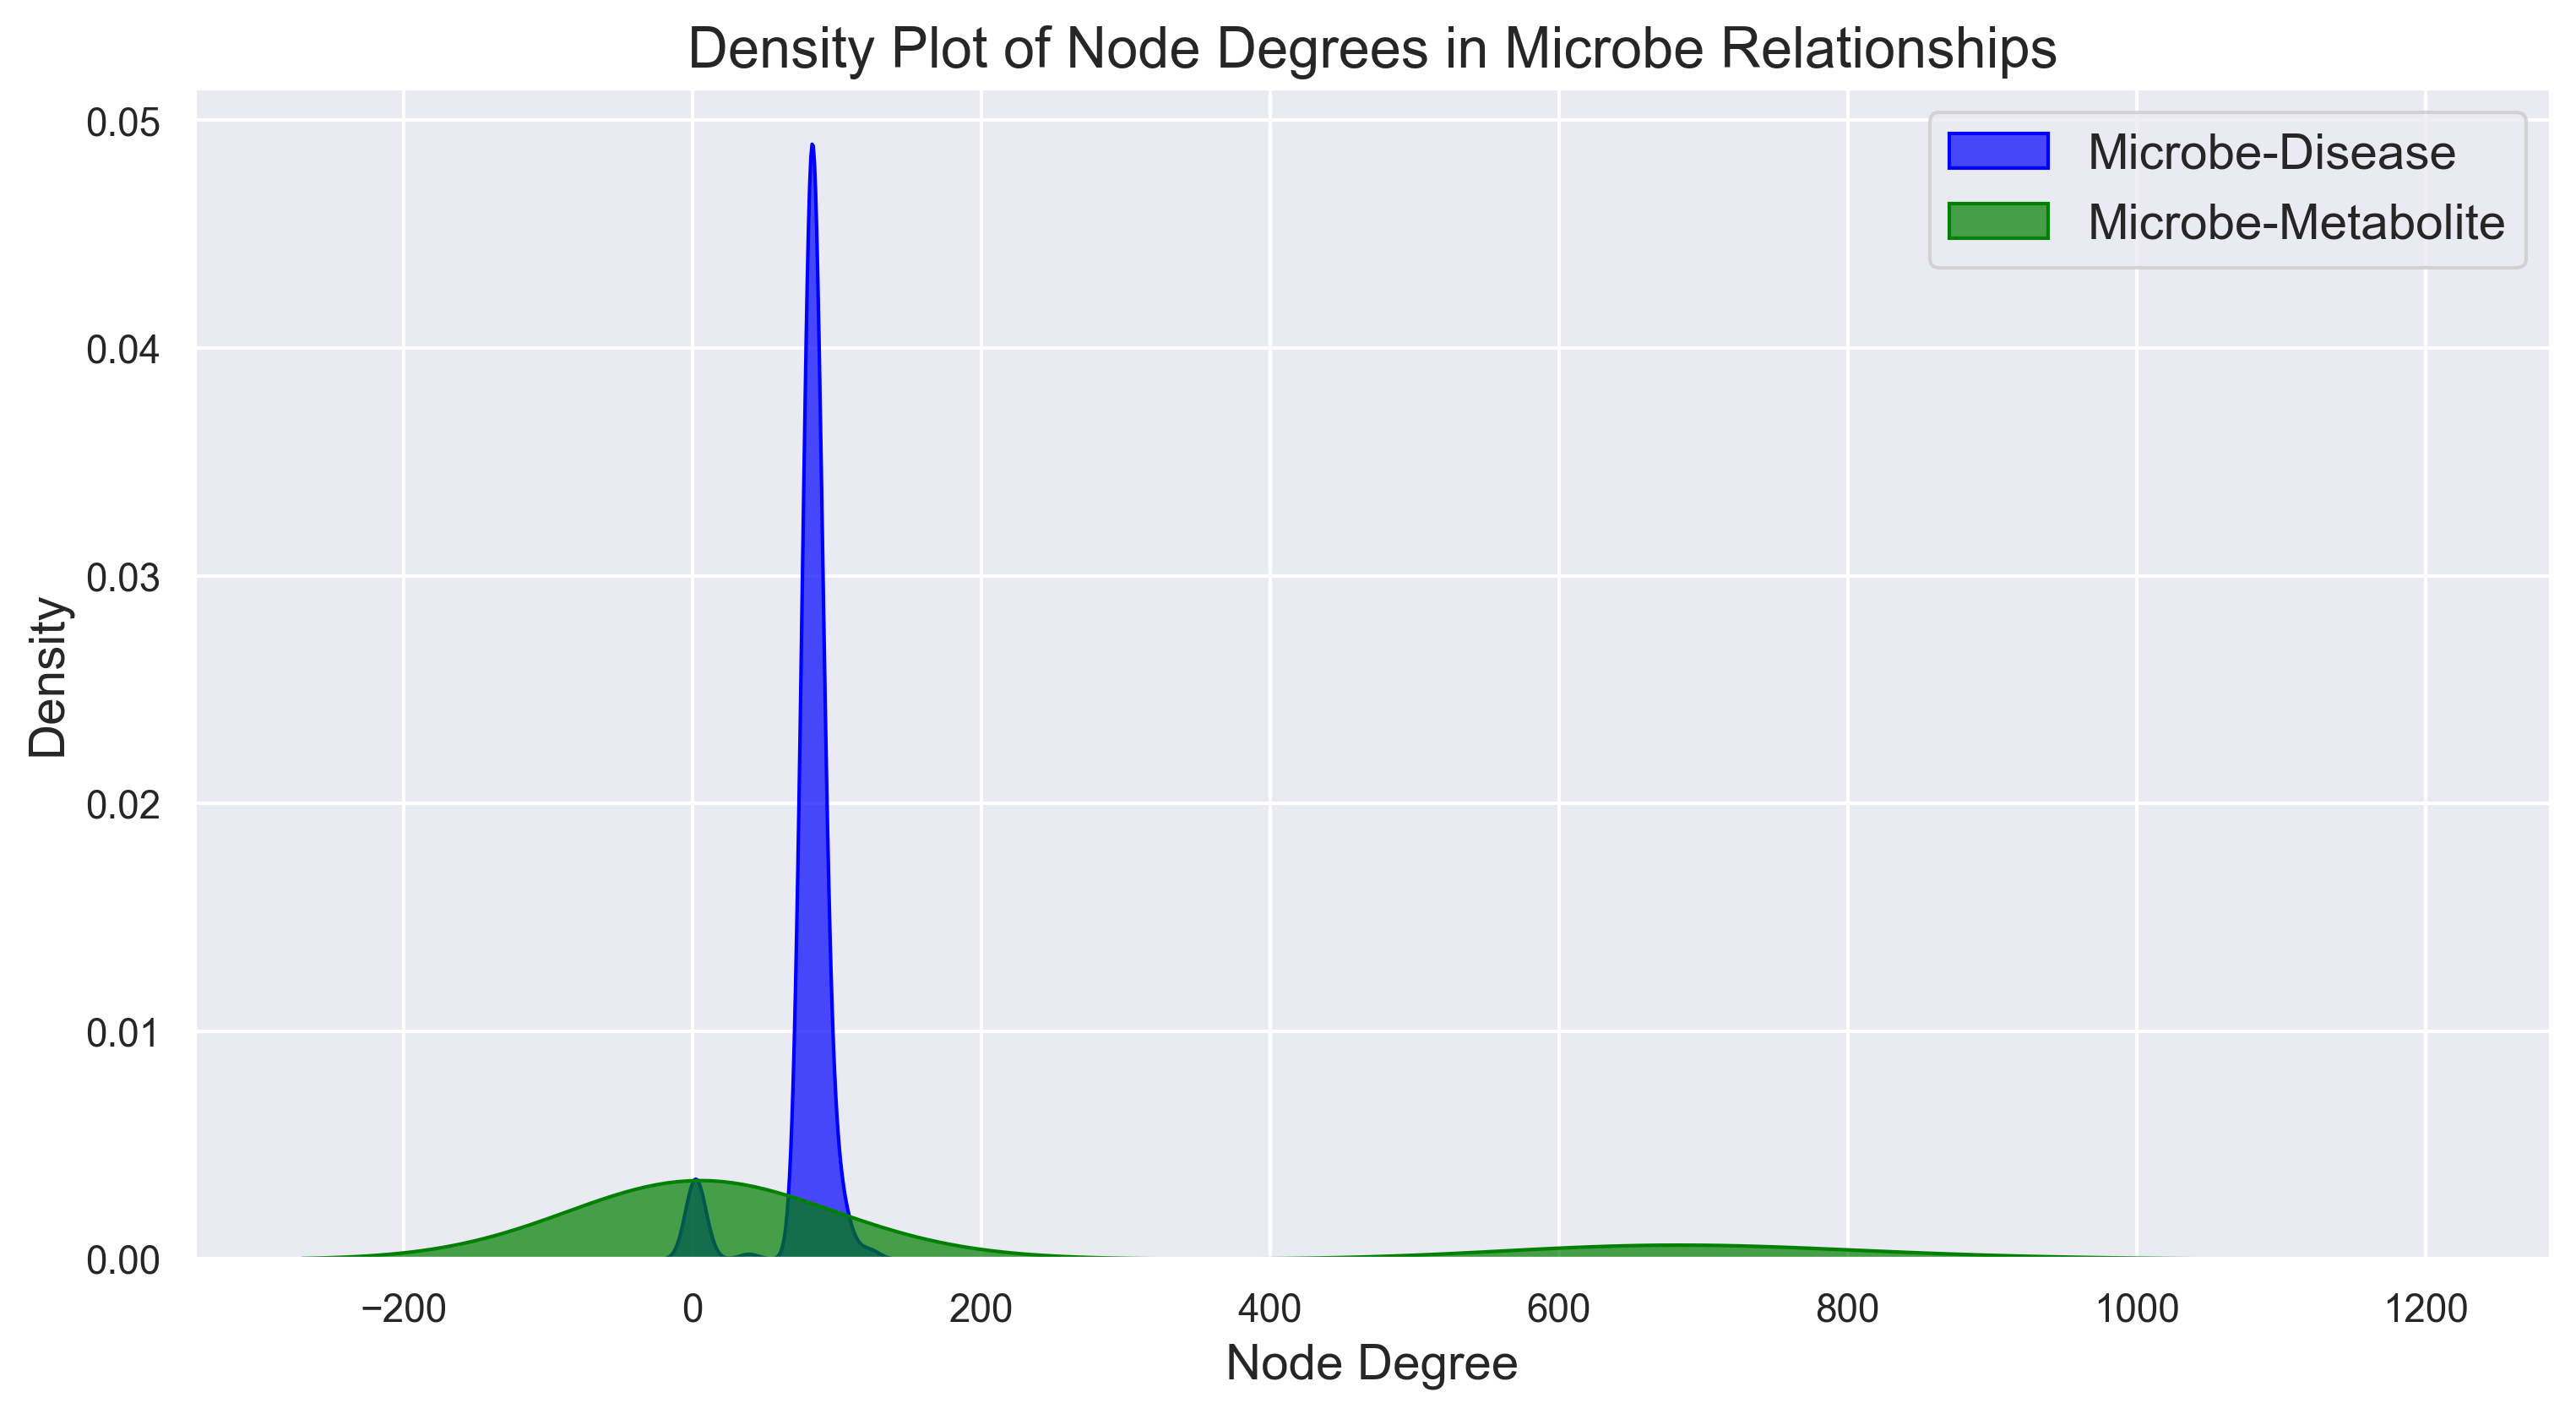

In [26]:
plot_density_distribution(
    entity_counts=node_d4microbe,
    entity_name="microbe",
    label1="Microbe-Disease",
    label2="Microbe-Metabolite"
)
